In [279]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from io import StringIO 
from IPython.display import Image 
import pydotplus
from sklearn import preprocessing
from sklearn import tree
import pickle

%matplotlib inline

client = MongoClient("localhost", 27017, maxPoolSize=50)
db = client.book
collection = db['FullTimeMatchesWithStats']
cursor = collection.find()
df =  pd.DataFrame(list(cursor))
pd.set_option('display.max_rows', 5000)
pd.options.display.max_columns = None

df = df[ (df.differenceAt75<3)  & (df.differenceAt75>-3) ]


dfYes = df[df.goalScoredLast15 == True]
dfNo = df[df.goalScoredLast15 == False]
print( "Yes Count:" +  str(len(dfYes)) )
print( "No Count:" + str(len(dfNo)) )
print(len(dfYes) / (len(dfNo)+len(dfYes)))


df = df[[ 
                                         'startingatwithtime'
                                        ,'hometeamname'
                                        ,'awayteamname'
                                         ,'homeGoalsUpTo75'
                                        ,'awayGoalsUpTo75'
                                         ,'homeyellowUpTo75'
                                        ,'awayyellowUpTo75'
                                        ,'resultAt45'
                                        ,'differenceAt75'
                                        ,'reddifferenceAt75'
    
                                        ,'resultChangedAt75'
    
    
                                        ,'twoGoalsScoredLast45'
                                         
                        
                                        ,'differenceAt45'
                                        ,'reddifferenceAt45'
                              
                                        ,'resultChangedAt45'
                                        ,'resultChangedAt75'
                                      
                                       # ,'AwayFouls74'
                                        ,'AwayAttacks74'
                                        ,'AwayCorners74'
                                        ,'AwayDangerousAttacks74'
                                        ,'AwayShotsOffGoal74'
                                        ,'AwayShotsOnGoal74'
                                         ,'AwayFouls74'
    
                                        #,'HomeFouls74'
                                        ,'HomeAttacks74'
                                        ,'HomeCorners74'
                                        ,'HomeDangerousAttacks74'
                                        ,'HomeShotsOffGoal74'
                                        ,'HomeShotsOnGoal74'
                                        ,'HomePossesionTime74'
                                         ,'HomeFouls74'
    
    
                                        ,'AwayAttacks59'
                                        ,'AwayCorners59'
                                        ,'AwayDangerousAttacks59'
                                        ,'AwayShotsOffGoal59'
                                        ,'AwayShotsOnGoal59'
                                         ,'AwayFouls59'
                                   
                                        ,'HomeAttacks59'
                                        ,'HomeCorners59'
                                        ,'HomeDangerousAttacks59'
                                        ,'HomeShotsOffGoal59'
                                        ,'HomeShotsOnGoal59'
                                        ,'HomeFouls59'
                                   
    
    
    
                                        ,'AwayAttacks44'
                                        ,'AwayCorners44'
                                        ,'AwayDangerousAttacks44'
                                        ,'AwayShotsOffGoal44'
                                        ,'AwayShotsOnGoal44'
                                        
                                        ,'HomeAttacks44'
                                        ,'HomeCorners44'
                                        ,'HomeDangerousAttacks44'
                                        ,'HomeShotsOffGoal44'
                                        ,'HomeShotsOnGoal44'
    
                                        ,'homeGoals45To75'
                                        ,'awayGoals45To75'                         
                                        ,'homeYellows59To75'
                                        ,'awayYellows59To75'                     
                                    
    
                                        ,'goalScoredLast15'
                               
                                        ,'AwayTeamRunningPointAverage'
                                        ,'HomeTeamRunningPointAverage'
                                        ,'HomeTeamWhileHomeAverageAttack'
                               
                                        ,'AwayTeamWhileAwayAverageAttack'
                           
                                      ]].copy()
        
df = df.dropna()



df = df.convert_objects(convert_numeric=True)


df['DiffAwayAttacks74to44'] = df.AwayAttacks74 - df.AwayAttacks44 
df['DiffAwayCorners74to44'] = df.AwayCorners74 - df.AwayCorners44      
df['DiffAwayDangerousAttacks74to44'] = df.AwayDangerousAttacks74 - df.AwayDangerousAttacks44      
df['DiffAwayShotsOffGoal74to44'] = df.AwayShotsOffGoal74 - df.AwayShotsOffGoal44      
df['DiffAwayShotsOnGoal74to44'] = df.AwayShotsOnGoal74 - df.AwayShotsOnGoal44
                    
df['DiffHomeAttacks74to44'] = df.HomeAttacks74 - df.HomeAttacks44 
df['DiffHomeCorners74to44'] = df.HomeCorners74 - df.HomeCorners44      
df['DiffHomeDangerousAttacks74to44'] = df.HomeDangerousAttacks74 - df.HomeDangerousAttacks44      
df['DiffHomeShotsOffGoal74to44'] = df.HomeShotsOffGoal74 - df.HomeShotsOffGoal44      
df['DiffHomeShotsOnGoal74to44'] = df.HomeShotsOnGoal74 - df.HomeShotsOnGoal44



df['DiffAwayAttacks74to59'] = df.AwayAttacks74 - df.AwayAttacks59
df['DiffAwayCorners74to59'] = df.AwayCorners74 - df.AwayCorners59      
df['DiffAwayDangerousAttacks74to59'] = df.AwayDangerousAttacks74 - df.AwayDangerousAttacks59     
df['DiffAwayShotsOffGoal74to59'] = df.AwayShotsOffGoal74 - df.AwayShotsOffGoal59      
df['DiffAwayShotsOnGoal74to59'] = df.AwayShotsOnGoal74 - df.AwayShotsOnGoal59
df['DiffAwayFouls74to59'] = df.AwayFouls74 - df.AwayFouls59

df['DiffHomeAttacks74to59'] = df.HomeAttacks74 - df.HomeAttacks59
df['DiffHomeCorners74to59'] = df.HomeCorners74 - df.HomeCorners59      
df['DiffHomeDangerousAttacks74to59'] = df.HomeDangerousAttacks74 - df.HomeDangerousAttacks59      
df['DiffHomeShotsOffGoal74to59'] = df.HomeShotsOffGoal74 - df.HomeShotsOffGoal59     
df['DiffHomeShotsOnGoal74to59'] = df.HomeShotsOnGoal74 - df.HomeShotsOnGoal59
df['DiffHomeFouls74to59'] = df.HomeFouls74 - df.HomeFouls59

print(len(df))
dfYes = df[df.goalScoredLast15 == True]
dfNo = df[df.goalScoredLast15 == False]
print( "Yes Count:" +  str(len(dfYes)) )
print( "No Count:" + str(len(dfNo)) )
print(len(dfYes) / (len(dfNo)+len(dfYes)))



Yes Count:542
No Count:703
0.4353413654618474
774
Yes Count:338
No Count:436
0.43669250645994834


/home/darth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:124: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


size: 774
Accuracy: 0.5450643776824035


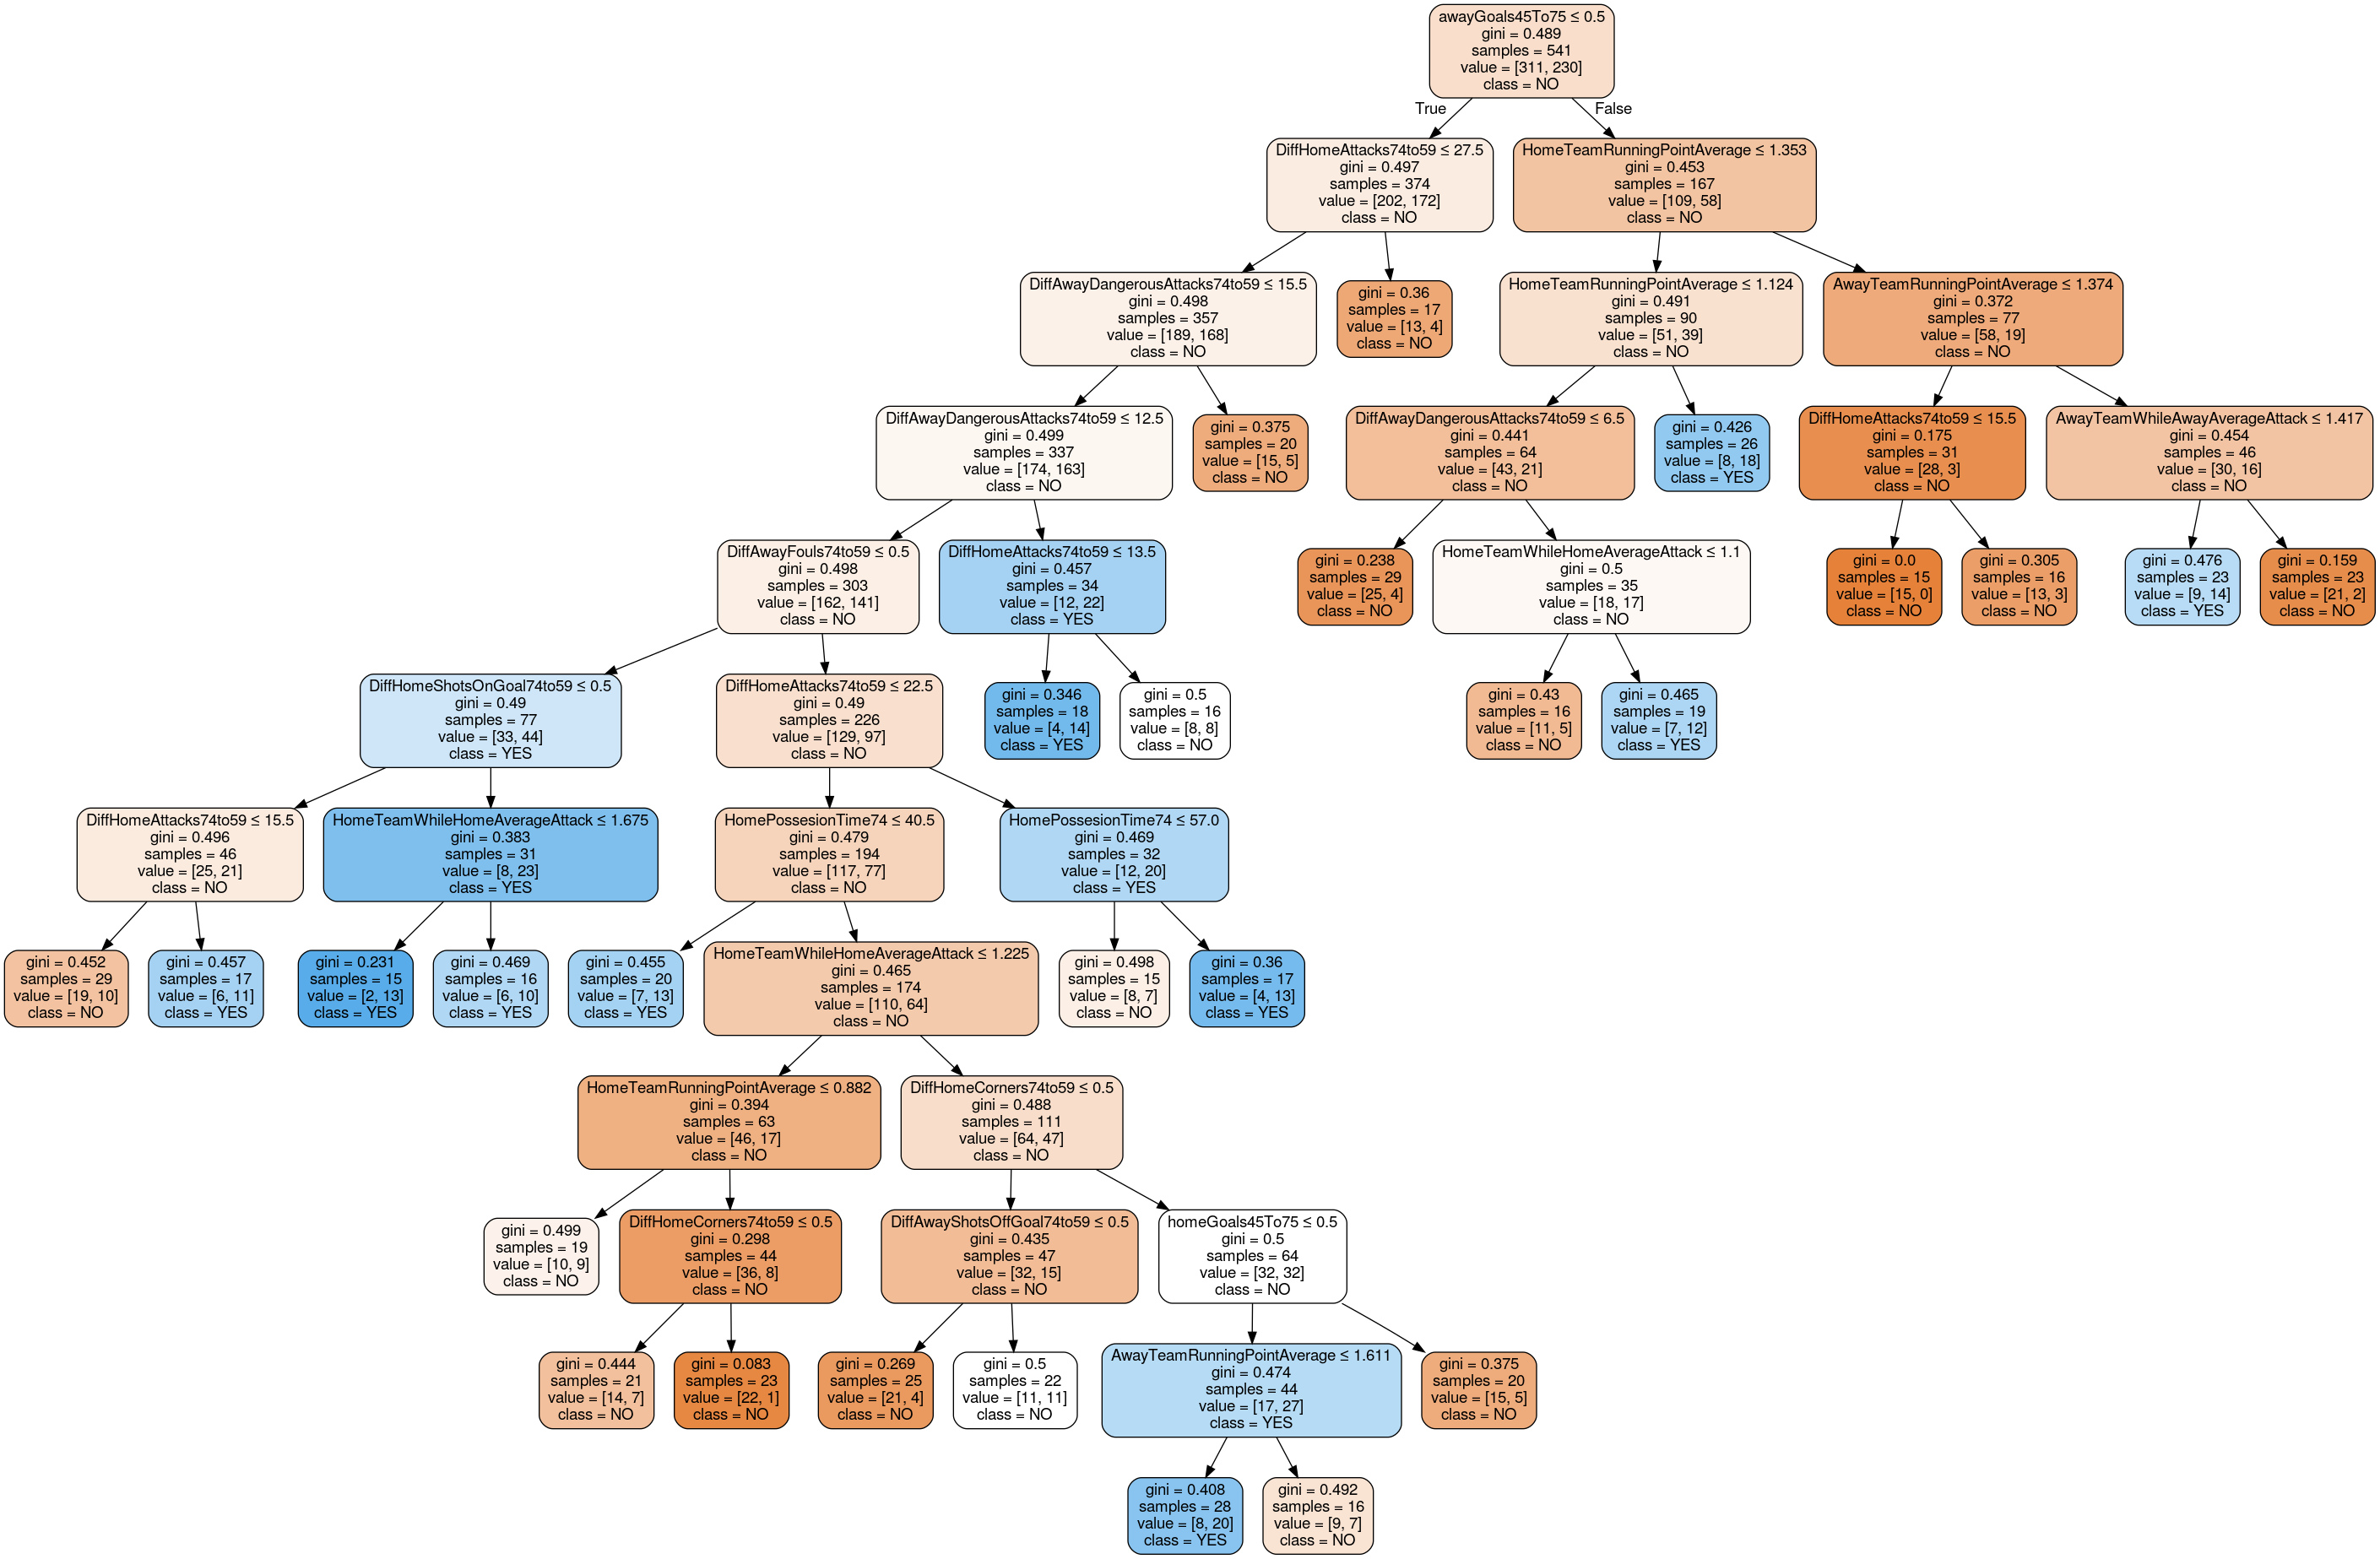

In [280]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())



feature_cols = [                       
                    
    
                                        'DiffAwayAttacks74to59'
                                       ,'DiffAwayCorners74to59' 
                                       ,'DiffAwayDangerousAttacks74to59'      
                                       ,'DiffAwayShotsOffGoal74to59'
                                       ,'DiffAwayShotsOnGoal74to59'
                                       ,'DiffAwayFouls74to59'
    
                                       ,'DiffHomeAttacks74to59'
                                       ,'DiffHomeCorners74to59'    
                                       ,'DiffHomeDangerousAttacks74to59' 
                                       ,'DiffHomeShotsOffGoal74to59'      
                                       ,'DiffHomeShotsOnGoal74to59'
                                       ,'DiffHomeFouls74to59'
                                    
                                        ,'homeGoals45To75'
                                        ,'awayGoals45To75'                         
                                        ,'homeYellows59To75'
                                        ,'awayYellows59To75'                     
                                        
                                            ,'HomePossesionTime74'
                              
                                        
    
                                        ,'AwayTeamRunningPointAverage'
                                        ,'HomeTeamRunningPointAverage'
                                        ,'HomeTeamWhileHomeAverageAttack'
                               
                                        ,'AwayTeamWhileAwayAverageAttack'
                                      
                               
                                      
                         # ,'AwayFouls74'
                                      
    
                                    
                                                  #,'HomeFouls74'
                                               #   ,'AwayFouls74'
                              
                               
                                    
               ]
                                        
X = df[feature_cols] # Features
y = df.goalScoredLast15 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",max_depth=15,min_samples_leaf =15)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


print("size:",len(df))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_decision_tree(clf, X_train.columns,['NO','YES'])


In [253]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(df[feature_cols], y)

/home/darth/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [255]:
clf.predict(X_test[feature_cols])

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0.